# The Istanbul Metropolitan Municipality Car Park "ISPARK" Analysis <br>
*Prepared by Evren Ermis based the data from https://data.ibb.gov.tr/*
***

## 1 - Business Understanding

Yaka - ilçe park sayısı ve ortalama aylık abonman ücreti karşılaştırması

En pahalı ve en ucuz 5 nokta  - kaggledaki gibi renkli sıralama

aylık ücrete dayalı harita üzerinde dağılım

douluk oranı - 3 farklı saatte ve bunun harita üzerindeki dağılımı

## 2 - Data Understanding

### 2.1 - Data Load & Preprocessing

In [346]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [347]:
df = pd.read_excel("ibb_ispark.xlsx", sheet_name="İSPARK Otoparklarına Ait B.", index_col = 0)

In [348]:
# Lower all columns and put "_" ilo " "

df.columns = df.columns.str.replace(" ", "_")
df.columns = map(str.lower, df.columns)

In [349]:
df.shape

(731, 23)

In [379]:
df["park_adı"].duplicated().sum()

0

In [351]:
df.drop_duplicates(subset="park_adı", keep="first", inplace=True)

In [352]:
df.shape

(687, 23)

In [353]:
df.head()

,park_adı,lokasyon_id,lokasyon_kodu,lokasyon_adı,park_tipi_id,park_tipi,park_kapasitesi,calışma_saatleri,bölge_id,bölge,...,i̇lçe,adres,enlem/boylam,polygon_verisi,boylam,enlem,aylık_abonelik_ücreti,ücretsiz_parklanma_süresi_(dakika),tarifesi,park_et_devam_et_noktası
Park ID,,,,,,,,,,,,,,,,,,,,,
359,Atatürk Bulvarı 1,150,1,0001 Atatürk Bulvarı 1,2,YOL ÜSTÜ,18,07:30-18:30,4,Avrupa,...,FATİH,KEMALPAŞA MAHALLESİ ATATÜRK BULVARI 1 / EMİNÖNÜ,POINT (28.953538299155497 41.011291499669255),"MULTIPOLYGON (((28.95351077 41.01117896, 28.95...",28.953538,41.011291,0.0,15.0,"0-1 Saat : 10,00;1-2 Saat : 11,00;2-4 Saat ...",0
860,Bakırköy İstanbul Caddesi 1,384,2,0002 Bakırköy İstanbul Caddesi,2,YOL ÜSTÜ,30,08:00-19:00,4,Avrupa,...,BAKIRKÖY,YEŞİLKÖY MAHALLESİ İSTANBUL CADDESİ ÜZERİ BAKI...,POINT (28.8747420429072 40.97837155571149),"MULTIPOLYGON (((28.87445897 40.97835591, 28.87...",28.874742,40.978372,400.0,15.0,"0-1 Saat : 10,00;1-2 Saat : 12,00;2-4 Saat ...",0
861,Bakırköy İstanbul Caddesi 2,384,2,0002 Bakırköy İstanbul Caddesi,2,YOL ÜSTÜ,30,08:00-19:00,4,Avrupa,...,BAKIRKÖY,YEŞİLKÖY MAHALLESİ İSTANBUL CADDESİ ÜZERİ BAKI...,POINT (28.875321425593391 40.97841938898064),"MULTIPOLYGON (((28.87546464 40.97842251, 28.87...",28.875321,40.978419,400.0,15.0,"0-1 Saat : 10,00;1-2 Saat : 12,00;2-4 Saat ...",0
862,Bakırköy İstanbul Caddesi 3,384,2,0002 Bakırköy İstanbul Caddesi,2,YOL ÜSTÜ,70,08:00-19:00,4,Avrupa,...,BAKIRKÖY,YEŞİLKÖY MAHALLESİ İSTANBUL CADDESİ ÜZERİ BAKI...,POINT (28.87595720460348 40.978472523602171),"MULTIPOLYGON (((28.87628195 40.9784853, 28.876...",28.875957,40.978473,400.0,15.0,"0-1 Saat : 10,00;1-2 Saat : 12,00;2-4 Saat ...",0
867,Bakırköy İstanbul Caddesi 8,384,2,0002 Bakırköy İstanbul Caddesi,2,YOL ÜSTÜ,40,08:00-19:00,4,Avrupa,...,BAKIRKÖY,YEŞİLKÖY MAHALLESİ İSTANBUL CADDESİ ÜZERİ BAKI...,POINT (28.878947832742334 40.978643838182634),"MULTIPOLYGON (((28.87909771 40.97868195, 28.87...",28.878948,40.978644,400.0,15.0,"0-1 Saat : 10,00;1-2 Saat : 12,00;2-4 Saat ...",0


### 2.2 - Side & District Analysis by Park Count and Monthly Price

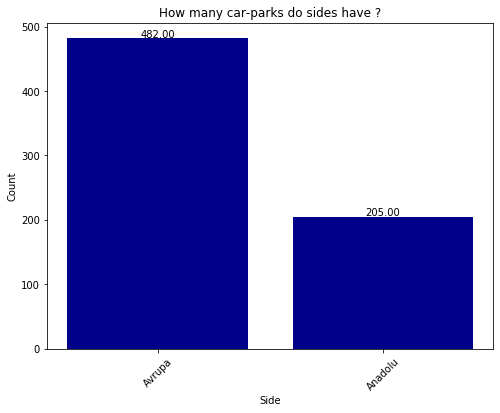

In [354]:
side_name = df.groupby("bölge")["lokasyon_id"].count().sort_values(ascending=False).index
side_park_count = df.groupby("bölge")["lokasyon_id"].count().sort_values(ascending=False).values

plt.subplots(figsize=(8,6))

xs = side_name
ys = side_park_count

plt.bar(xs, ys, color="darkblue")
plt.xlabel('Side')
plt.ylabel('Count')
plt.title("How many car-parks do sides have ?")
plt.xticks(rotation=45)

# annotation
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,1), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

Apparently eu side has 2x car park count of anatolian side

In [355]:
# Lets split our data into sides of Istanbul to illustrate district's car park count and average monthly cost

df_avp = df[df["bölge"]=="Avrupa"]
df_and = df[df["bölge"]=="Anadolu"]

# European Side dataframe creation
avp_location = df_avp.groupby("i̇lçe")["lokasyon_id"].count().index
avp_count = df_avp.groupby("i̇lçe")["lokasyon_id"].count().values
avp_cost = df_avp.groupby("i̇lçe")["aylık_abonelik_ücreti"].mean().round(0).values
df_avp_final = pd.DataFrame({"location": avp_location, "park_count": avp_count, "park_avg_monthly_cost":avp_cost})

# Anatolian Side dataframe creation
and_location = df_and.groupby("i̇lçe")["lokasyon_id"].count().index
and_count = df_and.groupby("i̇lçe")["lokasyon_id"].count().values
and_cost = df_and.groupby("i̇lçe")["aylık_abonelik_ücreti"].mean().round(0).values
df_and_final = pd.DataFrame({"location": and_location, "park_count": and_count, "park_avg_monthly_cost":and_cost})

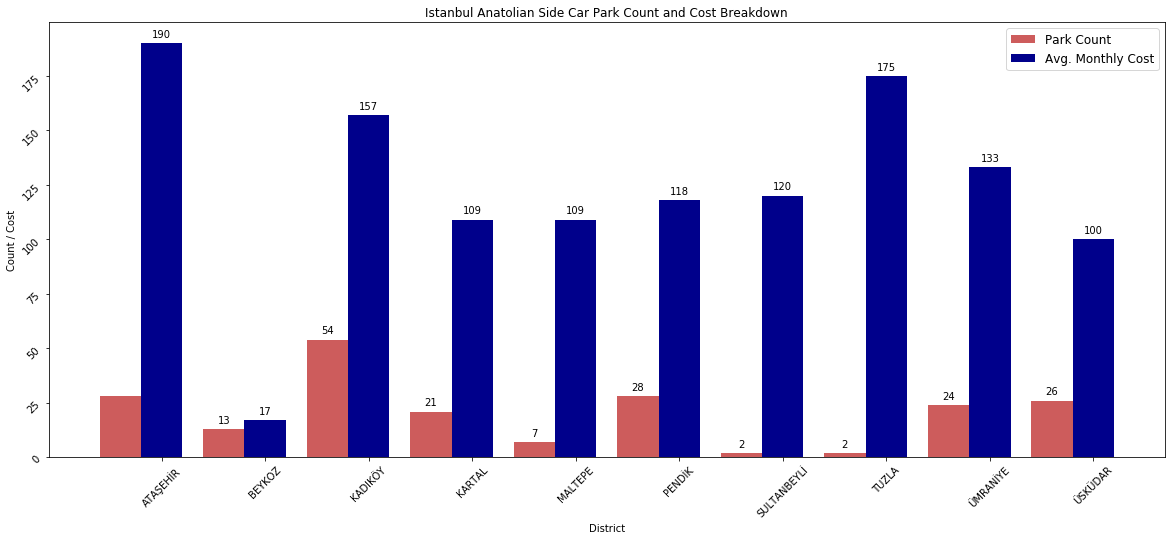

In [356]:
# Anatolian Side district car park count and cost breakdown
fig, ax = plt.subplots(figsize=(20,8))

x = np.arange(len(df_and_final["location"]))
width = 0.40 # width of bar

xs = df_and_final["location"]
ys_1 = df_and_final["park_count"]
ys_2 = df_and_final["park_avg_monthly_cost"]


ax.bar(x, ys_1, color= "indianred", align='center', width=width, label="Park Count")
ax.bar(x + width , ys_2, color= "darkblue", align='center', width=width, label="Avg. Monthly Cost")

ax.set_title("Istanbul Anatolian Side Car Park Count and Cost Breakdown")
ax.set_xlabel('District')
ax.set_ylabel('Count / Cost')

ax.set_xticklabels(xs)
ax.set_xticks(x + width)
ax.tick_params(rotation=45)

# Annotation link: https://stackoverflow.com/questions/43554521/add-data-label-to-grouped-bar-chart-in-matplotlib
for p in ax.patches[1:]:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    if h != 0:
        ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), 
                   textcoords="offset points", ha="center", va="bottom")

ax.legend(loc="upper right", fontsize="large")
plt.show()

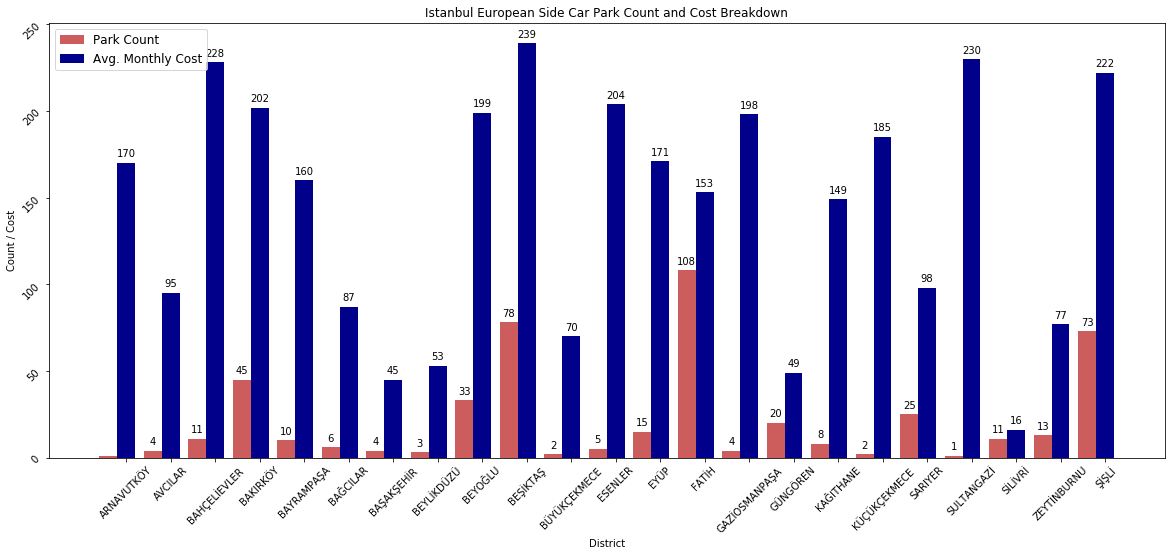

In [357]:
# Anatolian Side district car park count and cost breakdown
fig, ax = plt.subplots(figsize=(20,8))

x = np.arange(len(df_avp_final["location"]))
width = 0.40 # width of bar

xs = df_avp_final["location"]
ys_1 = df_avp_final["park_count"]
ys_2 = df_avp_final["park_avg_monthly_cost"]


ax.bar(x, ys_1, color= "indianred", align='center', width=width, label="Park Count")
ax.bar(x + width , ys_2, color= "darkblue", align='center', width=width, label="Avg. Monthly Cost")

ax.set_title("Istanbul European Side Car Park Count and Cost Breakdown")
ax.set_xlabel('District')
ax.set_ylabel('Count / Cost')

ax.set_xticklabels(xs)
ax.set_xticks(x + width)
ax.tick_params(rotation=45)

# Annotation link: https://stackoverflow.com/questions/43554521/add-data-label-to-grouped-bar-chart-in-matplotlib
for p in ax.patches[1:]:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    if h != 0:
        ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), 
                   textcoords="offset points", ha="center", va="bottom")

ax.legend(loc="upper left", fontsize="large")
plt.show()

In [358]:
df["enlem"].describe()

count    579.000000
mean      40.998477
std        0.508941
min       28.854073
25%       40.992252
50%       41.020753
75%       41.055416
max       41.196793
Name: enlem, dtype: float64

In [359]:
df["boylam"].describe()

count    578.000000
mean      28.981857
std        0.149553
min       28.243480
25%       28.945452
50%       28.993763
75%       29.039414
max       29.326817
Name: boylam, dtype: float64

In [360]:
df[round(df["enlem"])==29].index

Int64Index([2455], dtype='int64', name='Park ID')

In [361]:
df.drop(df[round(df["enlem"])==29].index, inplace=True)

In [362]:
info = ((df["boylam"].min(), df["boylam"].max(),
         df["enlem"].min(),   df["enlem"].max()))
        
info

(28.2434800707908, 29.3268173933029, 40.8150088134286, 41.1967928344884)

In [363]:
ist_map = plt.imread("map.png")

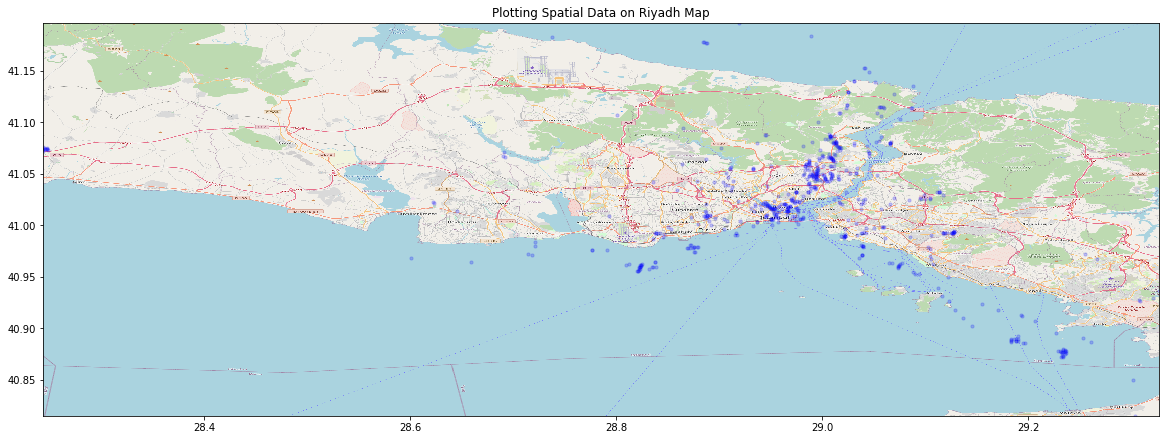

In [364]:
fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(df.boylam, df.enlem, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(info[0],info[1])
ax.set_ylim(info[2],info[3])
ax.imshow(ist_map, zorder=0, extent = info, aspect= 'equal')

## 2.3 - Live Status of ISPARK - Car Parking Lots

In [385]:
import requests

In [386]:
r = requests.get("https://api.ibb.gov.tr/ispark/Park")

In [387]:
df_live = pd.DataFrame.from_dict(r.json())

In [388]:
df_live.columns = df_live.columns.str.replace(" ", "_")
df_live.columns = map(str.lower, df_live.columns)

In [389]:
df_live.shape

(604, 10)

In [390]:
df_live["parkadi"].duplicated().sum()

23

In [391]:
df_live.drop_duplicates(subset="parkadi", keep="first", inplace=True)

In [392]:
df_live.shape

(581, 10)

In [393]:
df_live.head()

,parkid,parkadi,latitude,longitude,kapasitesi,boskapasite,parktipi,ilce,distance,ucretsizparklanmadk
0,395,Yeşil Vadi Sokak 4,40.9670716467854,29.1058243767132,40,26,YOL ÜSTÜ,ATAŞEHİR,0.372,15
1,1189,İçerenköy Açık Otoparkı 1,40.9765973901075,29.1045454144478,600,600,AÇIK OTOPARK,ATAŞEHİR,0.696,15
2,2151,Bostancı Vergi Dairesi Açık Otoparkı,40.9625308244579,29.1079999343615,105,103,AÇIK OTOPARK,ATAŞEHİR,0.907,0
4,1176,Kozyatağı Sebze-Meyve Hali,40.978484297008,29.1029469575332,1500,1499,AÇIK OTOPARK,ATAŞEHİR,0.918,0
5,1208,Bostancı İdo ve Adalar İskelesi Önü Taksi Durağı,40.952526073751,29.0937899011629,16,16,TAKSİ PARK,KADIKÖY,2.180,0


In [394]:
# Calculate %Utilization per parking lot

df_live["utilization"] = (100 - (round((df_live["boskapasite"] / df_live["kapasitesi"])*100,0)))

In [395]:
df_live.head()

,parkid,parkadi,latitude,longitude,kapasitesi,boskapasite,parktipi,ilce,distance,ucretsizparklanmadk,utilization
0,395,Yeşil Vadi Sokak 4,40.9670716467854,29.1058243767132,40,26,YOL ÜSTÜ,ATAŞEHİR,0.372,15,35.0
1,1189,İçerenköy Açık Otoparkı 1,40.9765973901075,29.1045454144478,600,600,AÇIK OTOPARK,ATAŞEHİR,0.696,15,0.0
2,2151,Bostancı Vergi Dairesi Açık Otoparkı,40.9625308244579,29.1079999343615,105,103,AÇIK OTOPARK,ATAŞEHİR,0.907,0,2.0
4,1176,Kozyatağı Sebze-Meyve Hali,40.978484297008,29.1029469575332,1500,1499,AÇIK OTOPARK,ATAŞEHİR,0.918,0,0.0
5,1208,Bostancı İdo ve Adalar İskelesi Önü Taksi Durağı,40.952526073751,29.0937899011629,16,16,TAKSİ PARK,KADIKÖY,2.180,0,0.0


In [396]:
df_live[df_live["utilization"] >= 70].sort_values(by="kapasitesi", ascending=False).head(10)

,parkid,parkadi,latitude,longitude,kapasitesi,boskapasite,parktipi,ilce,distance,ucretsizparklanmadk,utilization
478,1913,Alibeyköy Cep Otogarı Açık Otoparkı,41.0877898089066,28.9445382356644,5000,448,AÇIK OTOPARK,EYÜP,18.750,30,91.0
34,1988,Maltepe Orhangazi Şehir Parkı Açık Otoparkı 1,40.9313148438186,29.1160869598389,2750,0,AÇIK OTOPARK,MALTEPE,4.436,15,100.0
504,2866,15 Temmuz Demokrasi Otogarı,41.041551975453,28.8945926849422,1907,0,AÇIK OTOPARK,BAYRAMPAŞA,19.360,60,100.0
42,2808,Kadıköy Yeni Salı Pazarı Katlı Otoparkı,40.9977918776891,29.0500764411344,1350,0,KAPALI OTOPARK,KADIKÖY,5.519,15,100.0
522,2350,Bayrampaşa Adapark Katlı Otoparkı,41.0641450801525,28.8872194290161,650,160,KAPALI OTOPARK,BAYRAMPAŞA,21.050,15,75.0
514,1987,Haznedar Yer Altı Otoparkı,41.0083594114747,28.8728436954286,540,133,KAPALI OTOPARK,GÜNGÖREN,19.960,10,75.0
489,2581,Bayrampaşa Muzaffer Öztekin Zemin Altı Otoparkı,41.0509194015194,28.9070179949042,400,97,KAPALI OTOPARK,BAYRAMPAŞA,18.880,15,76.0
116,1474,Kartal Hasan Doğan Spor Kompleksi,40.8925343906162,29.189911589983,400,0,KAPALI OTOPARK,KARTAL,11.220,15,100.0
7,1455,Bostancı Açık,40.9522908984578,29.0902551716656,375,58,AÇIK OTOPARK,KADIKÖY,2.344,15,85.0
473,2053,Bayrampaşa Muratpaşa Yer Altı Otoparkı,41.0470196674183,28.9081365083218,300,47,KAPALI OTOPARK,BAYRAMPAŞA,18.600,15,84.0


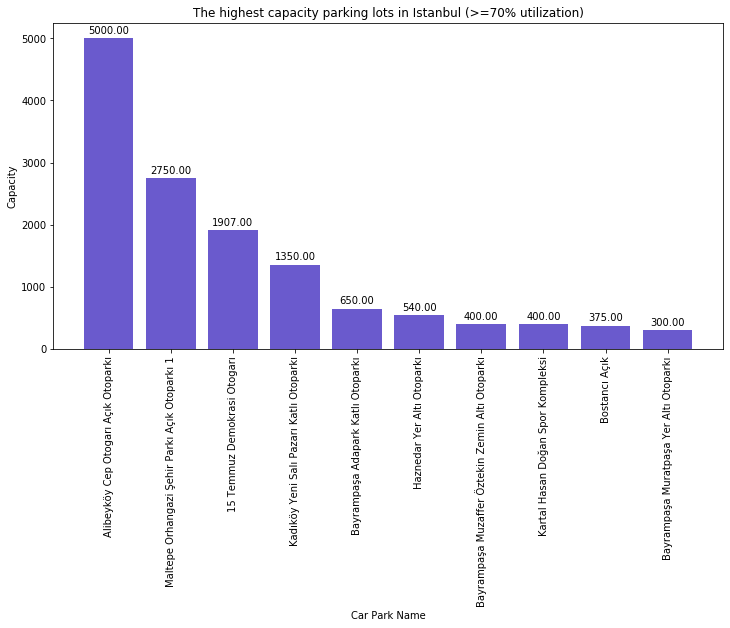

In [397]:
# Graph to illustrate parking lots which have the highest capability (utilization >= 70)

plt.subplots(figsize=(12,6))

xs = df_live[df_live["utilization"] >= 70].sort_values(by="kapasitesi", ascending=False).head(10)["parkadi"].values
ys = df_live[df_live["utilization"] >= 70].sort_values(by="kapasitesi", ascending=False).head(10)["kapasitesi"].values

plt.bar(xs, ys, color="slateblue")
plt.xlabel('Car Park Name')
plt.ylabel('Capacity')
plt.title("The highest capacity parking lots in Istanbul (>=70% utilization)")
plt.xticks(rotation=90)

# annotation
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

In [398]:
# Create a dataset contains avg utilization and parking lot capacity per district

df_district_capacity = pd.DataFrame({"location":df_live.groupby("ilce")["kapasitesi"].sum().index,
                                    "capacity":df_live.groupby("ilce")["kapasitesi"].sum().values})

df_district = pd.DataFrame({"location":df_live.groupby("ilce")["utilization"].mean().sort_values(ascending=False).index,
                            "avg_utilization": round(df_live.groupby("ilce")["utilization"].mean(),1).sort_values(ascending=False).values}
                          )

df_district = df_district.merge(df_district_capacity, on="location")
df_district.head(20).style.background_gradient(cmap='Greens')

,location,avg_utilization,capacity
0,BAŞAKŞEHİR,66.5,355
1,ESENLER,55,1694
2,BAYRAMPAŞA,54.7,4252
3,BÜYÜKÇEKMECE,47,140
4,SULTANBEYLİ,46,430
5,BEYKOZ,43.2,1103
6,GAZİOSMANPAŞA,38.5,60
7,KARTAL,36.3,2014
8,EYÜP,35.3,15527
9,MALTEPE,33.6,3385


parayı da ekle

In [400]:
df_district_capacity = pd.DataFrame({"location":df_live.groupby("ilce")["kapasitesi"].sum().index,
                                    "capacity":df_live.groupby("ilce")["kapasitesi"].sum().values})
df_district_capacity.head()

,location,capacity
0,ARNAVUTKÖY,700
1,ATAŞEHİR,2555
2,AVCILAR,1370
3,BAHÇELİEVLER,1360
4,BAKIRKÖY,5087


In [401]:
df_live.groupby("ilce")["kapasitesi"].sum()

ilce
ARNAVUTKÖY         700
ATAŞEHİR          2555
AVCILAR           1370
BAHÇELİEVLER      1360
BAKIRKÖY          5087
BAYRAMPAŞA        4252
BAĞCILAR           645
BAŞAKŞEHİR         355
BEYKOZ            1103
BEYLİKDÜZÜ        1570
BEYOĞLU           3616
BEŞİKTAŞ          5877
BÜYÜKÇEKMECE       140
ESENLER           1694
EYÜP             15527
FATİH             6924
GAZİOSMANPAŞA       60
GÜNGÖREN          2525
KADIKÖY           6090
KARTAL            2014
KAĞITHANE         3103
KÜÇÜKÇEKMECE      1387
MALTEPE           3385
PENDİK            4238
SARIYER           7072
SULTANBEYLİ        430
SULTANGAZİ         104
SİLİVRİ            425
TUZLA              600
ZEYTİNBURNU       6055
ÜMRANİYE          1375
ÜSKÜDAR           2624
ŞİŞLİ             4078
Name: kapasitesi, dtype: int64

This repository has been created for Udacity Data Scientist Nanodegree Program - Write A Data Science Blog Post Project